In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
dataset=pd.read_csv('loan-train.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

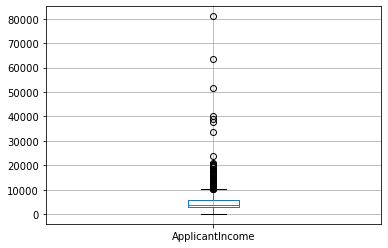

In [8]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

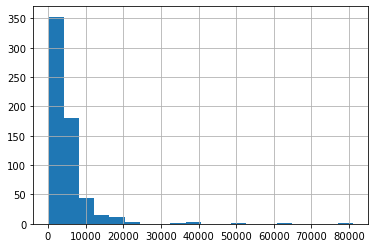

In [9]:
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

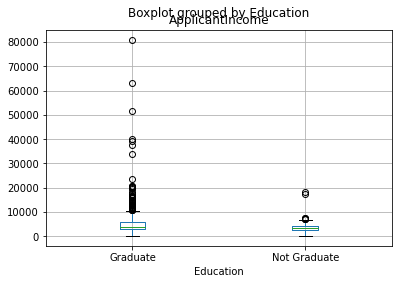

In [10]:
dataset.boxplot(column='ApplicantIncome', by='Education')

<AxesSubplot:>

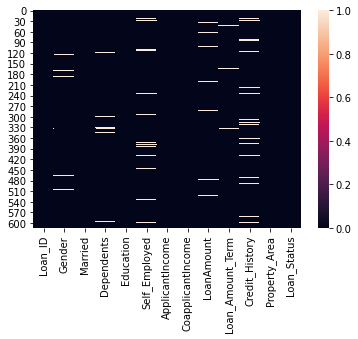

In [11]:
sns.heatmap(dataset.isnull())

In [12]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
dataset['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [14]:
train1=dataset.drop(['Loan_ID'],axis=1)

In [15]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train1.shape

(614, 12)

In [17]:
train1.dropna(how='all').shape

(614, 12)

In [18]:
train1.dropna(how='any',thresh=5).shape

(614, 12)

In [19]:
train1.dropna(subset = ['LoanAmount','Credit_History'],how='all').shape

(613, 12)

In [20]:
train1.dropna(subset = ['Credit_History'],axis=0,inplace=True)

In [21]:
train1.dropna(subset = ['LoanAmount'],axis=0,inplace=True)

In [22]:
train1.shape

(543, 12)

In [23]:
train1.fillna({'Loan_Amount_Term' : 360},inplace=True)

In [24]:
train1['Self_Employed'].value_counts()

No     445
Yes     72
Name: Self_Employed, dtype: int64

In [25]:
train1['Self_Employed'].fillna(train1['Self_Employed'].value_counts().index[0],inplace=True)

In [26]:
train1['Gender'].fillna(train1['Gender'].value_counts().index[0],inplace=True)

In [27]:
train1['Married'].fillna(train1['Married'].value_counts().index[0],inplace=True)

In [28]:
train1['Dependents'].mean

<bound method Series.mean of 1       1
2       0
3       0
4       0
5       2
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 543, dtype: object>

In [29]:
train1['Dependents'].fillna(train1['Dependents'].value_counts().index[0],inplace=True)

In [30]:
train1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
train1.shape

(543, 12)

In [32]:
corelation  = train1.corr()

<AxesSubplot:>

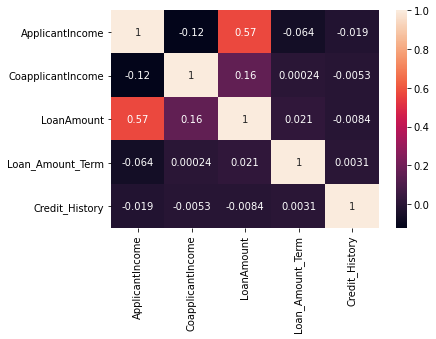

In [33]:
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

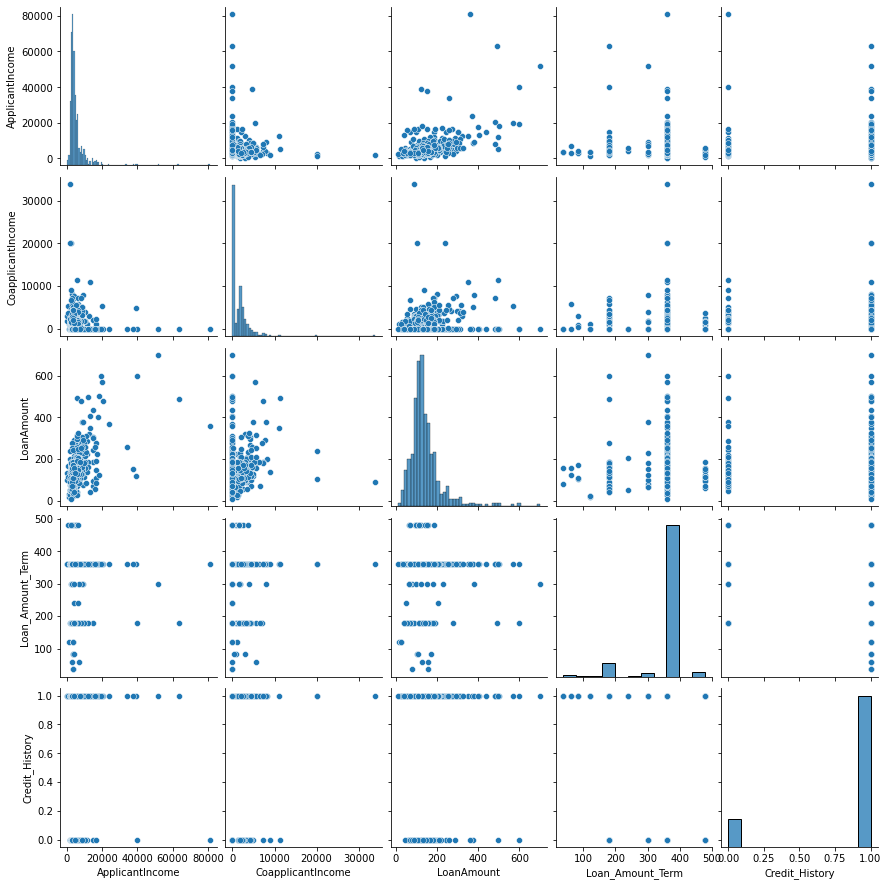

In [34]:
sns.pairplot(train1)

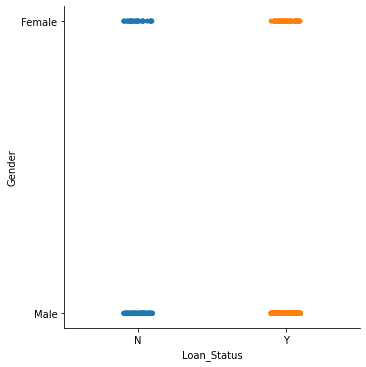

In [35]:
 sns.catplot(x='Loan_Status',y='Gender',data=train1)

In [36]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             543 non-null    object 
 1   Married            543 non-null    object 
 2   Dependents         543 non-null    object 
 3   Education          543 non-null    object 
 4   Self_Employed      543 non-null    object 
 5   ApplicantIncome    543 non-null    int64  
 6   CoapplicantIncome  543 non-null    float64
 7   LoanAmount         543 non-null    float64
 8   Loan_Amount_Term   543 non-null    float64
 9   Credit_History     543 non-null    float64
 10  Property_Area      543 non-null    object 
 11  Loan_Status        543 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 75.1+ KB


<AxesSubplot:xlabel='Loan_Status', ylabel='Gender'>

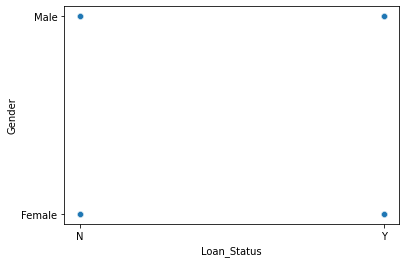

In [37]:
sns.scatterplot(x='Loan_Status',y='Gender',data=train1)

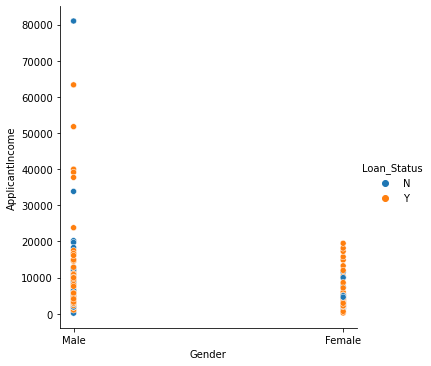

In [38]:
sns.relplot(x='Gender',y='ApplicantIncome',hue='Loan_Status',data=train1)

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

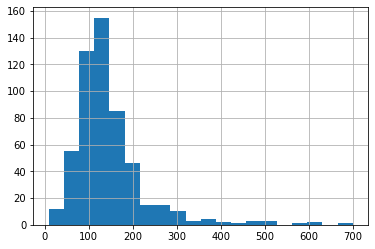

In [40]:
train1['LoanAmount'].hist(bins=20)

<AxesSubplot:>

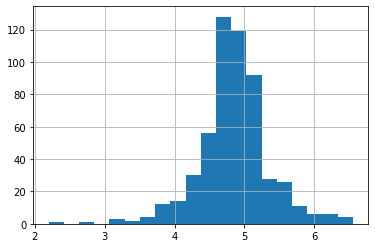

In [41]:
train1['LoanAmount_log']=np.log(train1['LoanAmount'])
train1['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

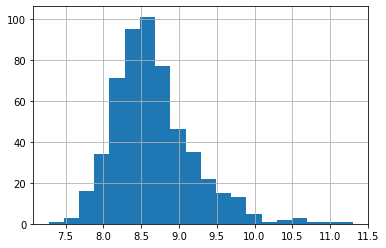

In [42]:
train1['TotalIncome']=train1['ApplicantIncome']+train1['CoapplicantIncome']
train1['TotalIncome_log']=np.log(train1['TotalIncome'])
train1['TotalIncome_log'].hist(bins=20)

In [43]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872


In [44]:
train1.shape

(543, 15)

In [45]:
x=train1.iloc[:,np.r_[1:4,8:10,12:15 ]].values
y=train1.iloc[:,12].values

In [46]:
y=train1.iloc[:,11].values

In [47]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y

In [48]:
x

array([['Yes', '1', 'Graduate', ..., 4.852030263919617, 6091.0,
        8.714567550836485],
       ['Yes', '0', 'Graduate', ..., 4.189654742026425, 3000.0,
        8.006367567650246],
       ['Yes', '0', 'Not Graduate', ..., 4.787491742782046, 4941.0,
        8.50532301884575],
       ...,
       ['Yes', '1', 'Graduate', ..., 5.53338948872752, 8312.0,
        9.025455532779063],
       ['Yes', '2', 'Graduate', ..., 5.231108616854587, 7583.0,
        8.933664178700935],
       ['No', '0', 'Graduate', ..., 4.890349128221754, 4583.0,
        8.430109084509125]], dtype=object)

In [49]:
x=train1.iloc[:,np.r_[0:4,8:10,12:14]].values

In [50]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872


In [51]:
train1.shape

(543, 15)

In [52]:
x

array([['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.787491742782046, 4941.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [53]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [55]:
print(x_train)

[['Female' 'Yes' '0' ... 1.0 4.867534450455582 2928.0]
 ['Male' 'Yes' '2' ... 1.0 5.616771097666572 16666.0]
 ['Male' 'No' '1' ... 0.0 5.062595033026967 6479.0]
 ...
 ['Male' 'Yes' '2' ... 1.0 4.248495242049359 3900.0]
 ['Female' 'No' '0' ... 1.0 4.74493212836325 4547.0]
 ['Male' 'Yes' '0' ... 1.0 4.875197323201151 5502.0]]


In [56]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [57]:
for i in range(0, 5):
    x_train[:,i]=LabelEncoder_x.fit_transform(x_train[:,i])

In [58]:
x_train[:,7]=LabelEncoder_x.fit_transform(x_train[:,7])

In [59]:
x_train

array([[0, 1, 0, ..., 1.0, 4.867534450455582, 25],
       [1, 1, 2, ..., 1.0, 5.616771097666572, 374],
       [1, 0, 1, ..., 0.0, 5.062595033026967, 256],
       ...,
       [1, 1, 2, ..., 1.0, 4.248495242049359, 86],
       [0, 0, 0, ..., 1.0, 4.74493212836325, 126],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 204]], dtype=object)

In [60]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [61]:
y_train

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [62]:
for i in range(0, 5):
    x_test[:,i]=LabelEncoder_x.fit_transform(x_test[:,i])

In [63]:
x_test[:,7]=LabelEncoder_x.fit_transform(x_test[:,7])

In [64]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [65]:
y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [67]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
y_pred = DTClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [69]:
from sklearn import metrics
print("the accuracy of desicion tree is :", metrics.accuracy_score(y_pred,y_test))

the accuracy of desicion tree is : 0.7614678899082569


In [70]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(x_train,y_train)

GaussianNB()

In [71]:
y_pred = NBClassifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [72]:
print("The accuracy of naive bayes is:", metrics.accuracy_score(y_pred,y_test))

The accuracy of naive bayes is: 0.8348623853211009


In [73]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
x, y = load_iris(return_X_y=True)

In [74]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train,y_train)

LogisticRegression()

In [75]:
y_pred = logistic_regression.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Logistic regression accuracy: ",accuracy)

Logistic regression accuracy:  0.8440366972477065
